<div class="alert alert-block alert-info">
<b>Деревья решений и KNN</b> 
</div>


In [13]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

<div class="alert alert-block alert-warning">
<b>Загрузка и минимальная предобработка данных:</b> 
</div>

In [14]:
#import 
#download link https://github.com/Yorko/mlcourse.ai/blob/master/data/telecom_churn.csv
df=pd.read_csv('telecom_churn.csv')
df.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [15]:
#самый минимум предобработки(просто выкинем не задумаываяь)
df.drop(['State','Voice mail plan'],axis=1, inplace=True)

In [16]:
df['International plan']=df['International plan'].map({'Yes':1, 'No':0})

In [17]:
#нет строк приз
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Number vmail messages   3333 non-null   int64  
 4   Total day minutes       3333 non-null   float64
 5   Total day calls         3333 non-null   int64  
 6   Total day charge        3333 non-null   float64
 7   Total eve minutes       3333 non-null   float64
 8   Total eve calls         3333 non-null   int64  
 9   Total eve charge        3333 non-null   float64
 10  Total night minutes     3333 non-null   float64
 11  Total night calls       3333 non-null   int64  
 12  Total night charge      3333 non-null   float64
 13  Total intl minutes      3333 non-null   float64
 14  Total intl calls        3333 non-null   

In [18]:
y=df['Churn'].astype('int')

In [19]:
X=df.drop('Churn',axis=1)

In [20]:
X.shape,y.shape

((3333, 17), (3333,))

In [21]:
#созд train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=17)

<div class="alert alert-block alert-warning">
<b>Дерево решений(KNN будет ниже)</b> 
</div>

#### Точность без изм гиперпараметро у дервева

In [22]:
#тут лучше делать random state, иначе иногд мог быть разн рез
first_tree=DecisionTreeClassifier(random_state=17)

In [23]:
#
from sklearn.model_selection import cross_val_score
cross_val_score(first_tree, X_train, y_train, cv=5)

array([0.9143469 , 0.91220557, 0.92077088, 0.90772532, 0.91416309])

In [24]:
#грубо говоря, это оценка без измен парамеров
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))

0.9138423504976518

#### Точность дерева решений покрутив гиперпарам

In [25]:
#гиперпарам дерева реш

In [26]:
#меняем max_depth
from sklearn.model_selection import GridSearchCV
tree_params={'max_depth':np.arange(1,11), 'max_features':[0.5,0.7,1]}
tree_grid=GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1)

In [27]:
%%time
#передаю на вход наши тестовые и пойдет кросс валидация
tree_grid.fit(X_train, y_train)

Wall time: 4 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.5, 0.7, 1]})

In [28]:
tree_grid.best_score_, tree_grid.best_params_

(0.9391366681677404, {'max_depth': 6, 'max_features': 0.7})

In [29]:
tree_grid.best_estimator_#это лучшее дерево

DecisionTreeClassifier(max_depth=6, max_features=0.7, random_state=17)

### Итог: в данном примере дерево лучше KNN, поэтому продолжаем работать с ним

In [30]:
#определились что дерево лучше, тогда можно считать train data

In [31]:
predictions=tree_grid.predict(X_test)

In [32]:
#точность
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.936

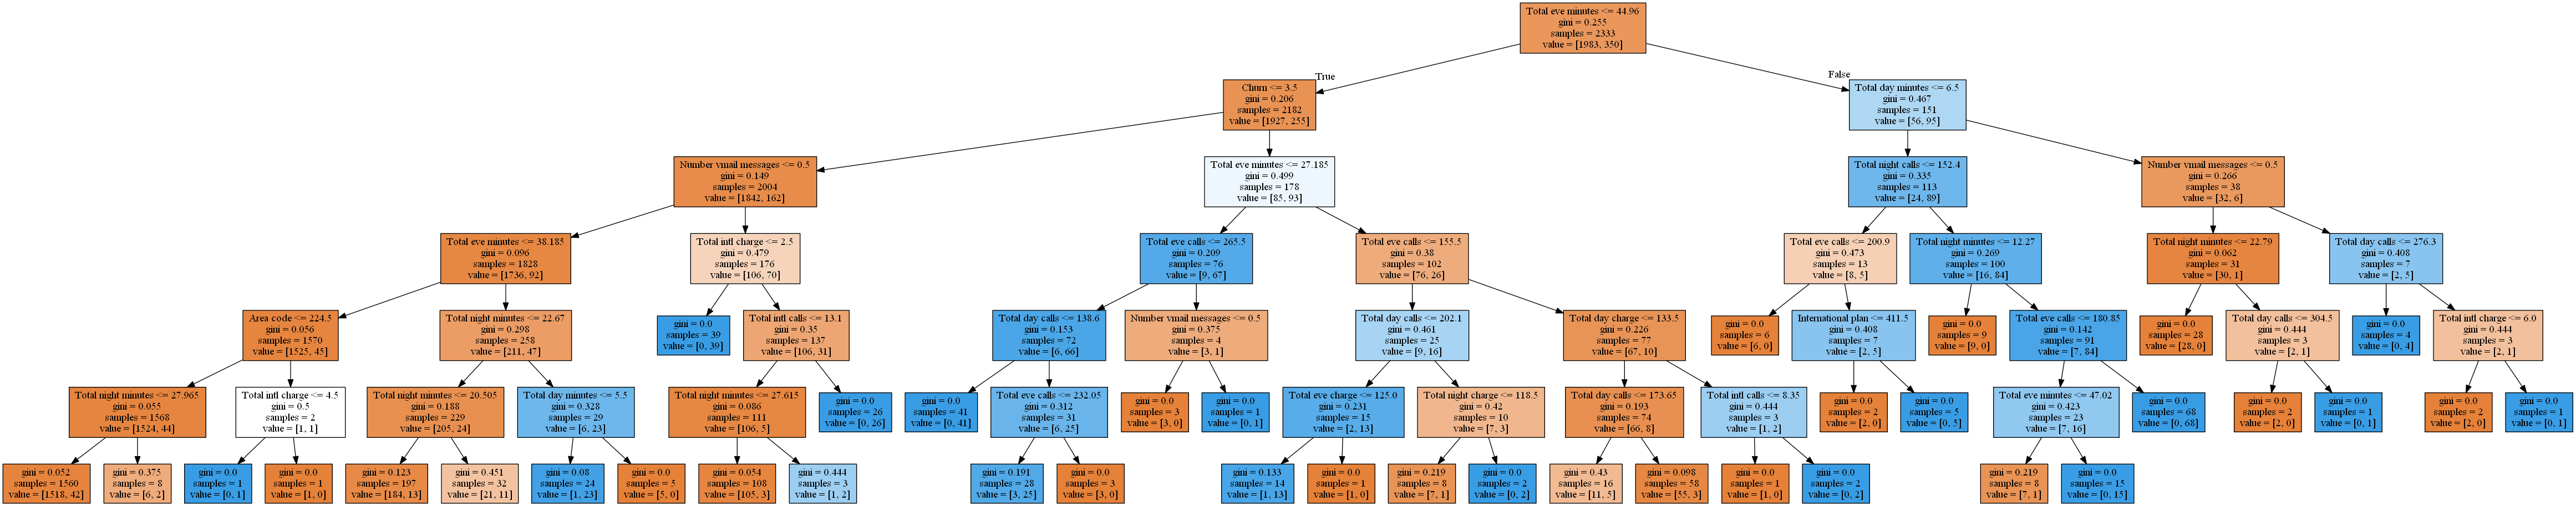

In [33]:
#Отрисовка
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot 

# %%
features = list(df.columns[1:])
features

# %%
dot_data = StringIO()
export_graphviz(tree_grid.best_estimator_,out_file=dot_data,feature_names=features,filled=True,rounded=False)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


In [34]:
#решили ограничить глубиной 3 и построить граф
second_tree=DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)
second_tree.score(X_test,y_test)

0.905

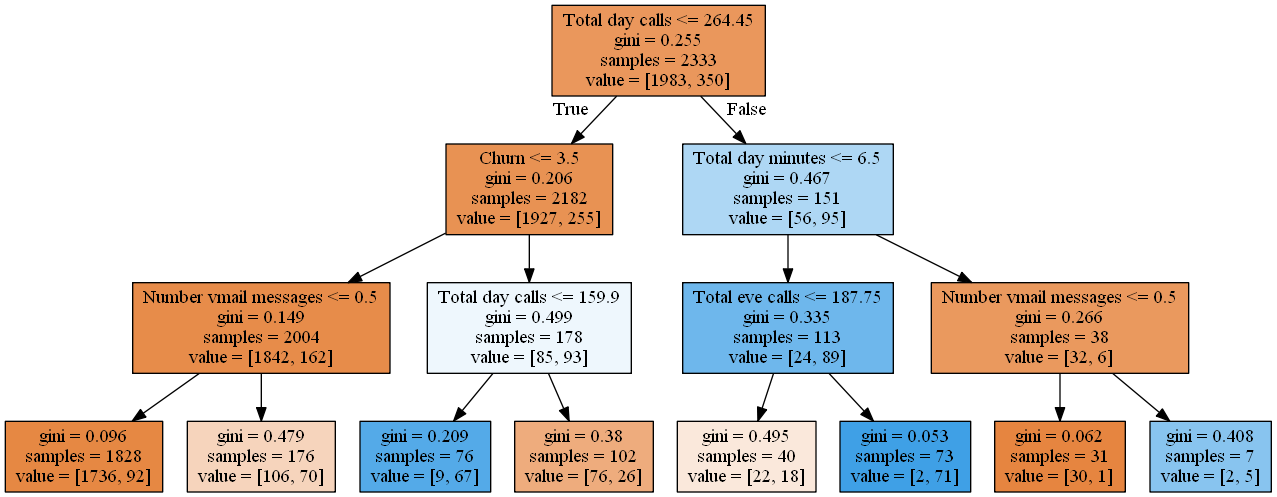

In [35]:
dot_data = StringIO()
export_graphviz(second_tree,out_file=dot_data,feature_names=features,filled=True,rounded=False)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

<div class="alert alert-block alert-warning">
<b>KNN(деревья решений выше)
    </b> 
</div>

#### Посмотрим точность KNN без измен гиперпарам

In [36]:
from sklearn.neighbors import KNeighborsClassifier
first_knn=KNeighborsClassifier()
np.mean(cross_val_score(first_knn, X_train, y_train, cv=5))

0.8671274043984523

#### Посмотрим точность KNN покрутив гиперпарам

In [37]:
knn_params={'n_neighbors': list(range(5,30,5))}

In [38]:
knn_grid=GridSearchCV(first_knn, knn_params, cv=5,n_jobs=-1 )

In [39]:
%%time
knn_grid.fit(X_train, y_train);

Wall time: 713 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15, 20, 25]})

In [40]:
knn_grid.best_score_,knn_grid.best_params_

(0.8701289391697531, {'n_neighbors': 10})